## Flights Data Exploration

This project explores a real-world dataset containing flights data from the US Department of Transportation.

The dataset contains observations of US domestic flights in 2013:


## Questions:

1. How do the carriers compare in terms of arrival delay performance?
2. Is there a noticeable difference in arrival delays for different days of the month?
3. Which departure airport has the highest average departure delay?
4. Is there any relationship between departure and arrival delays?


In [1]:
# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style='white')

warnings.filterwarnings('ignore')

%matplotlib inline


## Examine the data

In [2]:
# Import the data

path = "Datasets/flights.csv"

flights = pd.read_csv(path)

# View the top 3 rows

flights.head(3)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00


In [3]:
# Show the number of observations and variables of the data

print('The shape of the dataset is:', flights.shape)

The shape of the dataset is: (336776, 20)


In [4]:
# Sum the missing values in each column

flights.isna().sum()

Unnamed: 0           0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [5]:
# Check for duplicate records

print('There are',flights.duplicated().sum(),'duplicate records in the dataset')

There are 0 duplicate records in the dataset


In [6]:
# show the data types

print('The data types are\n:',flights.dtypes)

The data types are
: Unnamed: 0          int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object


In [7]:
# Show detailed description of variables,observations, and data types

print('Dataset information:\n')

flights.info()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
Unnamed: 0        336776 non-null int64
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(10), object(5)
memory usag

## Clean the missing values 

In [8]:
# Remove records with missing values

flights.dropna(axis=0, how='any', inplace= True)


# Check the cleaned data

print("All Missing Values Removed:")

flights.isna().sum()


All Missing Values Removed:


Unnamed: 0        0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

## Perform Analysis

### 1. How do the carriers compare in terms of arrival delay performance?

In [9]:
# Show average arrival delays by carriers

mean_arrival_performance = flights.groupby('carrier')['arr_delay'].mean()

pd.DataFrame(mean_arrival_performance.sort_values(ascending=False))

,arr_delay
carrier,
F9,21.920705
FL,20.115906
EV,15.796431
YV,15.556985
OO,11.931034
MQ,10.774733
WN,9.649120
B6,9.457973
9E,7.379669


### 2. Is there a noticeable difference in arrival delays for different days of the month?

In [10]:
# Show daily average arrival delays

daily_avg_arrival_delay = flights.groupby('day')['arr_delay'].mean()


# View first 10 days

pd.DataFrame(daily_avg_arrival_delay).sort_values('arr_delay',ascending=False).head(10)

,arr_delay
day,
8,19.072177
22,17.404916
23,16.740462
10,14.736009
12,11.138973
11,10.518073
24,10.478447
19,10.192674
18,10.107717


Text(0.5, 0, 'Days')

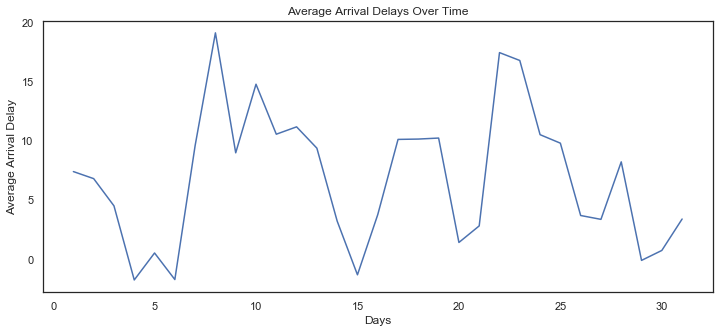

In [11]:
# plot average arrival delays 

plt.figure(figsize=(12,5))

plt.plot(daily_avg_arrival_delay)

plt.title("Average Arrival Delays Over Time")

plt.ylabel("Average Arrival Delay")

plt.xlabel('Days')

### 3. How do the departure delays vary with months?

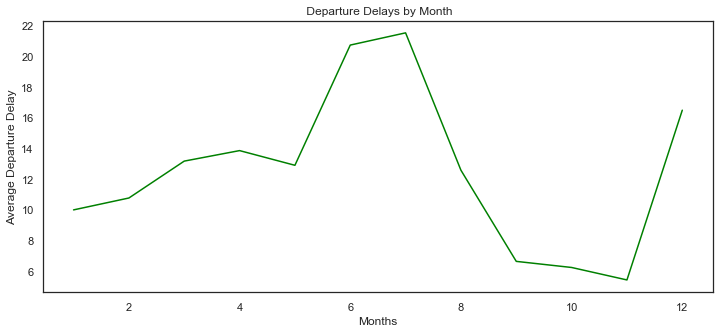

In [12]:
# Create a new dataframe 

monthly_dep_delays = flights.groupby('month')['dep_delay'].mean()

# set the size of the graph

plt.figure(figsize=(12,5))

#label the chart and axes

plt.title(" Departure Delays by Month")
plt.ylabel("Average Departure Delay")
plt.xlabel("Months")

# plot graphs

plt.plot(monthly_dep_delays, color='green')

### 4. Which departure airport has the highest average departure delay?

In [13]:
# show highest average departure delay by airport

avg_dep_delay = flights.groupby('origin')['dep_delay'].mean()

pd.DataFrame(avg_dep_delay.sort_values(ascending = False))

,dep_delay
origin,
EWR,15.009110
JFK,12.023607
LGA,10.286583


#### 5. Is there any relationship between departure and arrival delays?

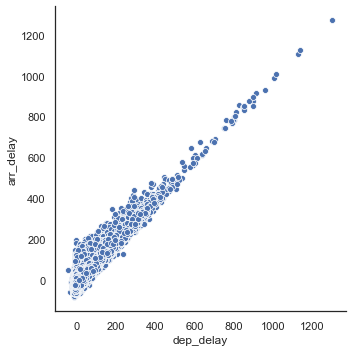

In [14]:
# plot a scatter chart

sns.relplot(x='dep_delay',y='arr_delay',data=flights)


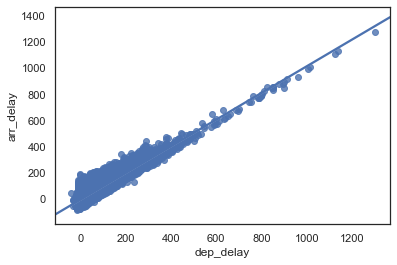

In [15]:
# Show scatter plot with y-line

sns.regplot(x='dep_delay',y='arr_delay',data=flights)


Departure delays tend to correlate with delays in arrivals